In [1]:
import math
from scipy import stats

import numpy as np
import matplotlib.pyplot as plt

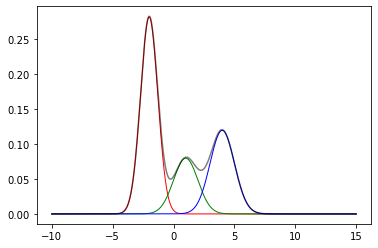

In [2]:
#Original set
Ao= stats.norm(-2, np.sqrt(0.5)) 
Bo = stats.norm(1, np.sqrt(1))
Co = stats.norm(4, np.sqrt(1))

#display function
def display(Ao,Bo,Co,w1,w2,w3):
    x = np.arange(-10, 15, 0.0001)
    ya = w1*Ao.pdf(x)
    yb = w2*Bo.pdf(x)
    yc = w3*Co.pdf(x)

    yd= w1*Ao.pdf(x) + w2*Bo.pdf(x)+w3*Co.pdf(x)

    plt.plot(x, ya, color='red', linewidth=1)
    plt.plot(x, yb, color='green',  linewidth=1)
    plt.plot(x, yc, color='blue', linewidth=1)
    plt.plot(x, yd, color='black', linestyle='-', alpha=0.5)


    plt.show()
    
display(Ao,Bo,Co,0.5,0.2,0.3)

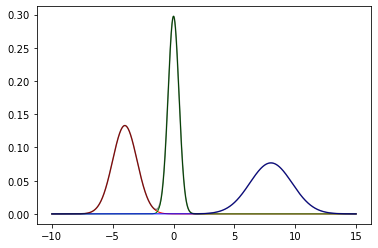

In [3]:
data =[-3, -2.5, -1, 0,2,4,5]

##Mixture models initialization
A= stats.norm(-4, np.sqrt(1)) 
B = stats.norm(0, np.sqrt(0.2))
C = stats.norm(8, np.sqrt(3))

##Weights initialization
w1,w2,w3= 1/3, 1/3 , 1/3

display(A,B,C,w1,w2,w3)

In [4]:
#Calculate responsibilities
def responsibilities(x, A,B,C, w1, w2, w3):
    asum = w1*A.pdf(x)
    bsum = w2*B.pdf(x)
    csum = w3*C.pdf(x)

    dsum = asum + bsum + csum
    
    return [round(asum/dsum,5), round(bsum/dsum,5), round(csum/dsum,5)]
    

allresponsibilities = np.array([responsibilities(dx, A,B,C, w1, w2, w3) for dx in data]).reshape((len(data),3))
print(allresponsibilities)

[[1.0000e+00 0.0000e+00 0.0000e+00]
 [1.0000e+00 0.0000e+00 0.0000e+00]
 [5.7070e-02 9.4293e-01 0.0000e+00]
 [1.5000e-04 9.9984e-01 1.0000e-05]
 [1.0000e-05 6.6240e-02 9.3375e-01]
 [0.0000e+00 0.0000e+00 1.0000e+00]
 [0.0000e+00 0.0000e+00 1.0000e+00]]


In [5]:
#Update mixture means
def updatemean(k, allresponsibilities, data):
    r_k = allresponsibilities[:,k]  #responsibilities of kth component
    numerator = np.sum([r_k for x in range(len(data))])
    denominator = np.sum(r_k)
    return numerator/denominator
    
means= [updatemean(k, allresponsibilities, data) for k in range(0,3)]

print(means)

[7.000000000000001, 7.0, 6.999999999999999]


In [6]:
#Update mixture sigmasquares
def updatesigmasq(k, allresponsibilities, data, means):
    r_k = allresponsibilities[:,k]   #responsibilities of kth component
    numerator = np.sum([r_k*(x-means[k])**2 for x in range(len(data))])
    denominator = np.sum(r_k)
    return numerator/denominator
    
sigmasqs = [updatesigmasq(k , allresponsibilities, data, means) for k in range(0,3)]

print(sigmasqs)


[140.00000000000006, 140.0, 139.99999999999994]


In [7]:
#Update mixture weights
def updateweights(k, allresponsibilities):
    numerator = np.sum(allresponsibilities[:,k])
    denominator = np.sum(allresponsibilities)
    return numerator/denominator
 
weights = [updateweights(k , allresponsibilities) for k in range(0,3)]

print(weights)

[0.29389000000000004, 0.2870014285714286, 0.41910857142857144]


In [8]:
#Negative Log Likelihood
def checkconverge(weights, means, sigmasqs, data):
    cumsum = 0
    for d in data:
        temp = 0
        for k in range(3):
            temp+= weights[k]*stats.norm(means[k], np.sqrt(sigmasqs[k])).pdf(d)
        cumsum = cumsum+ np.log(temp)*-1
    return cumsum
checkconverge(weights, means, sigmasqs, data)

checkconverge([w1,w2,w3],[-4,0,8],[1,0.2,3],data)

28.325535655854626

In [9]:
checkconverge(weights, means, sigmasqs, data)

24.947068211565274

In [10]:


checkconverge([w1,w2,w3],[-4,0,8],[1,0.2,3],data)

28.325535655854626

In [18]:
checkconverge([1/3,1/3,1/3],[-4,0,8],[1,0.2,3],data)
# 28.325535655854626

checkconverge([0.29,0.29,0.29],[-2.7,0.4,3.7],[0.14,0.44,1.53],data)
# 17.104225535272487

17.104225535272487